###Анализ влияния социально-экономических и демографических факторов на уровень зарегистрированных преступлений на 10 000 человек в регионах России в 2022 году

Работу выполнил:  
студент 3 курса  
Артемьев Александр Вячеславович


Используемые информационные источники
1. Сайт Государственной прокуратуры Российской Федерации :
https://epp.genproc.gov.ru/web/gprf/activity/crimestat
2. Федеральная служба государственной статистики:
https://rosstat.gov.ru/

####1.	Сформулировать содержательно задачу исследования. Подобрать данные пространственной выборки для проведения регрессионного анализа (зависимая переменная в модели регрессии должна быть непрерывной величиной).  Обосновать выбор переменных, которые будут участвовать в анализе. Ограничения: от 5 объясняющих переменных (из них допускается не более 20% бинарных или категориальных переменных, все прочие - непрерывные), объем выборки от 80 объектов (1 балл).

С течением времени изменяется уровень преступности и появляются
новые виды правонарушений, что оказывает огромное влияние на различные
сферы общества:  
• Заболеваемость и смертность населения  
• Экономические кризисы и спад производства  
• Материальный и моральный вред, причиненный обществу  
• Падение качества жизни населения  
Исследование зависимостей между социально-экономическими
показателями и уровнем преступности в регионах Российской Федерации
является актуальным и необходимым, ведь нахождение факторов,
объясняющих целую структуру правонарушений, поможет разработать
эффективные меры по снижению количества преступлений. Что напрямую
окажет положительное влияние на все общество в целом. Исследование
проводится на данных за 2022 год.

**Цель исследования:** Выявить влияние социально-экономических, демографических и инфраструктурных факторов на уровень преступности в российских регионах в 2022 году. Построить регрессионую модель, которая бы отражала зависимость количества преступлений от этих факторов.  
**Список используемых показателей для анализа**:  
Целевая переменная:  
y - Зарегистрированно преступлений на 10000 чел., за 2022 год  
Независимые переменные:  
$x_{1}-$Процент населения людей региона в возрасте старше трудоспособного  
$x_{2}-$Уровень безработицы   
$x_{3}-$Оценка туристического потока, по числу поездок  
$x_{4}-$Процент расходов на алкогольную продукцию, табачные изделия
и наркотики   
$x_{5}-$Количество спортивных
сооружений на 1000 человек  
$x_{6}-$Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации  
$x_{7}-$Прожиточный минимум  

**Обоснование выбранных переменных для регрессионого анализа**:  
1. Процент населения в возрасте старше трудоспособного – пожилые люди могут представлять уязвимую группу населения, склонную к большему риску стать жертвами преступлений.  
2. Уровень безработицы – более высокий уровень безработицы может повышать вероятность правонарушений.  
3. Оценка туристического потока (по числу поездок) – высокие показатели туристической активности могут коррелировать с ростом мелких преступлений.  
4. Процент расходов на алкоголь и табак – высокие расходы могут ассоциироваться с повышенной вероятностью нарушений порядка.  
5. Количество спортивных сооружений на 1,000 человек – может иметь двоякое влияние на уровень преступности. С одной стороны, наличие спортивных объектов может способствовать снижению преступности, предоставляя молодежи и другим группам возможность активно проводить досуг. С другой стороны, в некоторых случаях спортивные сооружения могут стать местами скопления людей, что может увеличивать вероятность конфликтов или мелких правонарушений.  
6. Количество собственных легковых автомобилей на 1000 человек - в регионах с более низким уровнем личной автомобилизации население чаще вынуждено пользоваться общественным транспортом, который может находиться не в шаговой доступности от дома. Это создает необходимость передвигаться по менее освещенным или удаленным участкам города, увеличивая вероятность столкновения с потенциально опасными ситуациями, особенно в ночное время.  
7. Прожиточный минимум – как показатель уровня жизни населения, может также быть связан с уровнем преступности.  

Выбор target переменной был обоснован в самом начале работы, единственное, что хотелось бы добавить:  
Было принято решение использовать именно этот относительный, а не
абсолютный показатель для исследования уровня преступности. Для
абсолютного показателя – количество преступлений, проводимое
исследование нецелесообразно, так как для двух субъектов с существенным
отличием в населении, существенно бы отличался уровень преступности, когда независимые переменные имели бы схожие значения.

####2.	Провести первичный анализ данных. Описать данные, визуализировать их. Предположить, каким образом независимые переменные должны оказывать влияние на объясняемую переменную из полученных предварительных результатов, общей логики, обзора соответствующей литературы. Провести корреляционный анализ, проверить наличие мультиколлинеарных признаков (в т.ч. с помощью VIFов) (1 балл).

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.outliers_influence import OLSInfluence
import warnings
import statsmodels.api as sm
import statsmodels.stats.api as sms
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
!pip install wget
import wget

Данные я разместил на github, чтобы сразу можно было их подгрузить в блокнот, с помощью wget

In [ ]:
filename = wget.download('https://raw.githubusercontent.com/Vealar/Mainor_IHW1/refs/heads/main/data-3.csv')

In [ ]:
data = pd.read_csv('/content/data-3.csv',sep=',', index_col=0,encoding='utf-8')
data.sample(5)

,"Зарегистрированно преступлений на 10000 чел., за 2022 год",Процент населения в возрасте старше трудоспособного,Уровень безработицы,"Оценка туристического потока, по числу поездок","Процент расходов на алкогольную продукцию, табачные изделия и наркотики",Количество спортивных сооружений на 1000 человек,Количество собственных легковых автомобилей на 1000 человек населения по субъектам Российской Федерации,Прожиточный минимум
Субъект РФ,,,,,,,,
Сахалинская область,175.782823,23.0,4.2,421225,1.698877,1.867130,355.427926,17209.0
Магаданская область,173.190967,19.3,4.1,89323,2.168809,2.204021,391.013662,22018.0
Липецкая область,125.170606,26.4,3.7,488599,2.961299,2.582793,389.676301,10503.0
Курганская область,167.049447,28.4,6.3,478923,2.852924,2.804622,427.402815,11895.0
Амурская область,210.388013,21.1,4.1,478703,3.257347,2.503306,312.444624,14704.0


Давайте переименуем столбцы в нашем датасете, для удобства в будущей работе с данными и их анализом

In [ ]:
data.columns = ['target','old_age','unemployment_rate','tourism_assessment','harmful_goods','sport_build','count_auto','cost_living']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   target              85 non-null     float64
 1   old_age             85 non-null     float64
 2   unemployment_rate   85 non-null     float64
 3   tourism_assessment  85 non-null     int64  
 4   harmful_goods       85 non-null     float64
 5   sport_build         85 non-null     float64
 6   count_auto          85 non-null     float64
 7   cost_living         85 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.0+ KB


Выведем основные статистики наших переменных

In [ ]:
data.describe()

,target,old_age,unemployment_rate,tourism_assessment,harmful_goods,sport_build,count_auto,cost_living
count,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000
mean,139.056796,23.296471,4.867059,1.810734e+06,3.048784,1.814707,327.310700,13278.908235
std,37.578456,4.565331,3.593956,3.742993e+06,1.190634,0.542865,74.824529,3263.895882
min,15.932608,8.800000,1.600000,3.664300e+04,0.089387,0.639441,117.265886,10503.000000
25%,117.100818,22.000000,3.300000,3.656850e+05,2.264936,1.495343,282.314310,11389.000000
50%,135.607304,24.200000,3.700000,7.526570e+05,2.920511,1.714048,328.959608,12148.000000
75%,167.049447,26.500000,5.000000,1.375624e+06,3.760632,2.057208,370.297469,13540.000000
max,210.388013,29.400000,30.000000,2.291429e+07,5.985345,3.721412,576.219998,28851.000000


Мы можем убедиться, что среди наших данных нет null value, а также что все переменные непрерывные. Теперь давайте посмотрим на распределения наших переменных.

In [ ]:
import scipy.stats as stats
def histograms(data):
  plt.figure(figsize=(15, 10))
  for i, column in enumerate(data.columns):
      plt.subplot(2, len(data.columns)//2, i+1)
      sns.histplot(data[column], kde=True, stat="density", linewidth=0)
      plt.title(f'Гистограмма: {column}')

      mean = data[column].mean()
      std = data[column].std()
      x = np.linspace(data[column].min(), data[column].max(), 100)
      normal_dist = stats.norm.pdf(x, mean, std)

      plt.plot(x, normal_dist, color='gray', linestyle='--', linewidth=2, label='Нормальное распределение')
      plt.legend()

  plt.tight_layout()
  plt.show()

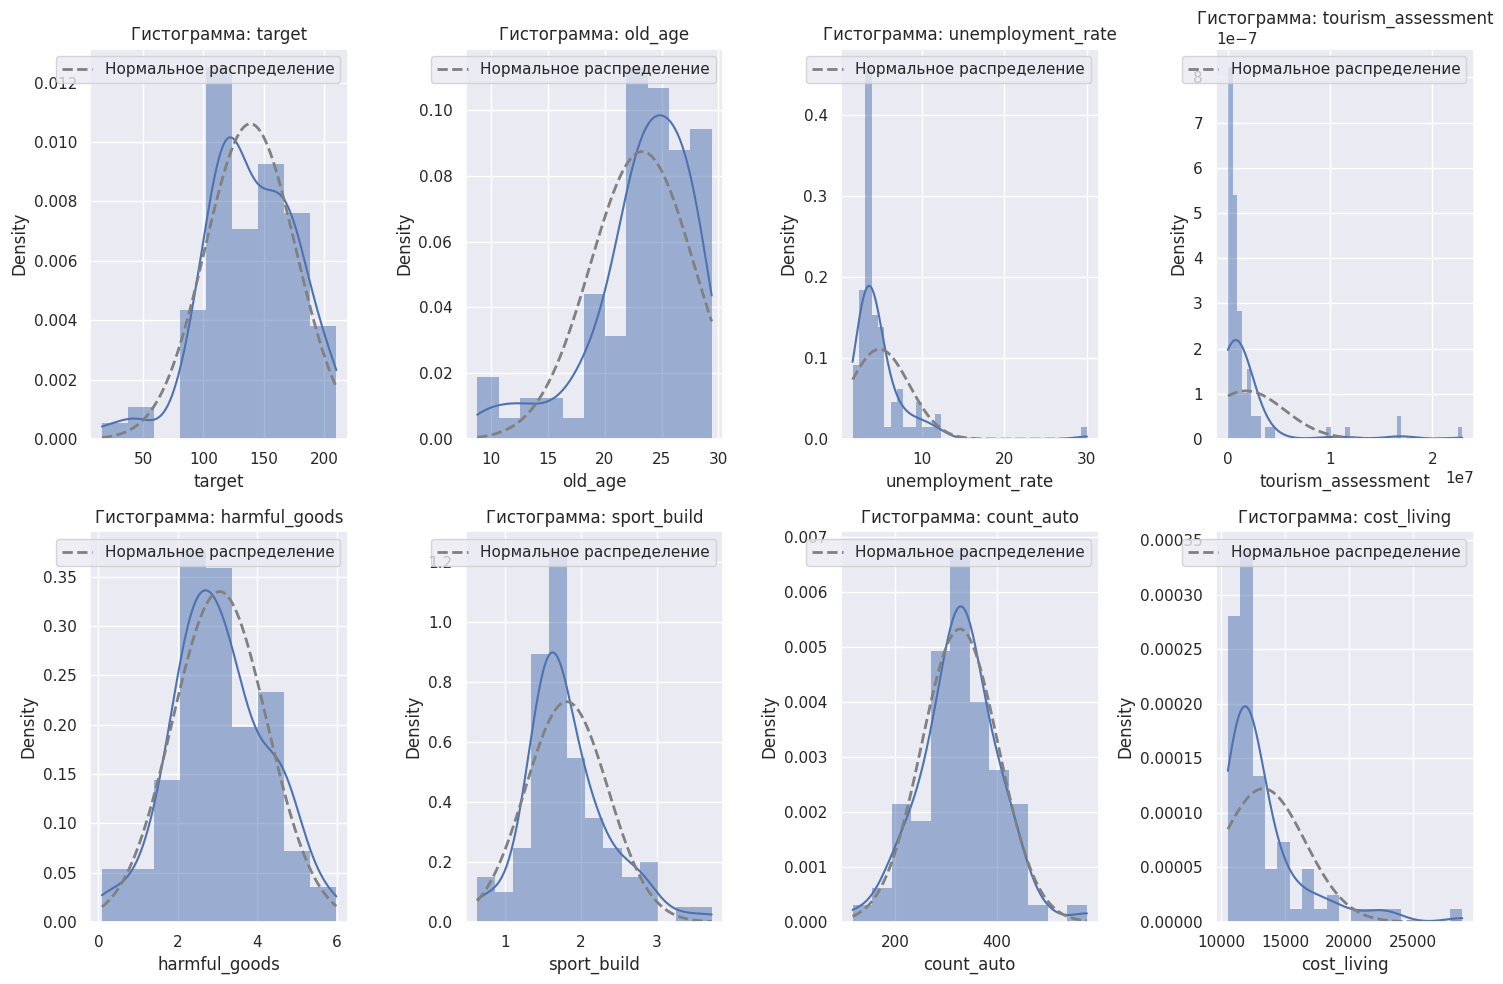

In [ ]:
histograms(data)

Давайте, проанализируем каждое распределение:

Целевая переменная (target) – выглядит почти нормально, с пиком около среднего значения. Можно заметить выбросы с малым значением преступности в части регионов.  
Процент населения старше трудоспособного возраста (old_age) – распределение смещено вправо, что может указывать на преобладание более старого населения в большинстве регионов. Небольшой хвост слева свидетельствует о наличии регионов с более высоким процентом молодых людей.  
Уровень безработицы (unemployment_rate) – Распределение  имеет левостороннее смещение, но из-за нескольких выбросов с критически высоким уровнем безработицы, без них распределение похоже на нормальное.  
Оценка туристического потока (tourism_assessment) – Очень сильное смещение влево, опять же из-за выбросов с высокой оценкой потока.  
Процент расходов на алкогольную и табачную продукцию (harmful_goods) – Распределение приближено к нормальному, с центром около среднего значения, что свидетельствует о том, что большинство регионов имеют схожие уровни расходов на алкоголь и табак.  
Количество спортивных сооружений (sport_build) – Распределение также симметрично и близко к нормальному, что говорит о том, что в большинстве регионов доступность спортивных сооружений достаточно схожа.  
Количество автомобилей на 1000 человек (count_auto) – Нормальное распределение.  
Прожиточный минимум (cost_living) – Наличие нескольких регионов с высоким прожиточным минимумом на фоне большинства с низким уровнем.

В целом, большинство переменных распределены асимметрично, из-за выбросов. Такую асимметрию можно побороть, либо удалением выбросов, либо с помщью логарифмического преобразования(например, для unemployment_rate, tourism_assessment, cost_living,old_age). У других же показателей распределение близко к нормальному. Поэтому следующим шагом разберемся с выбросами: проблема в том, что данных у нас и так всего 85 наблюдений, и убрав много выбросов будущую линейную регрессию будет сложно обучить. Построим box plots(тогда уже на этом этапе придется отнормировать данные для лучшего отображения ящиков с усами)

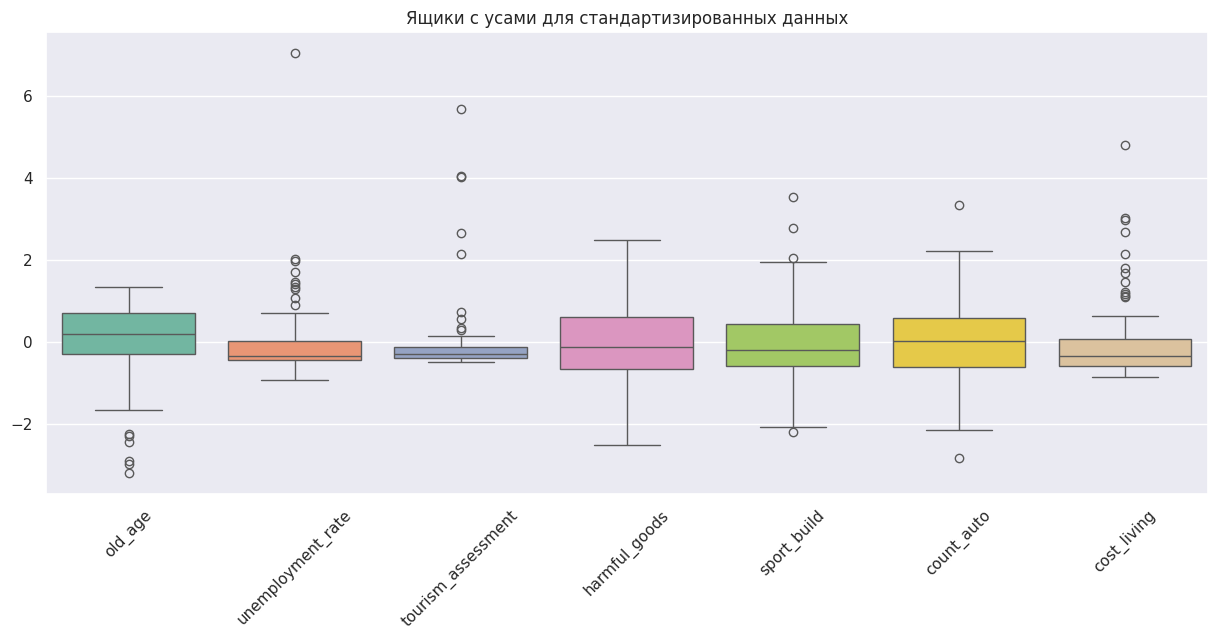

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('target', axis=1))
scaled_data_df = pd.DataFrame(scaled_data, columns=data.drop('target', axis=1).columns)
colors = sns.color_palette("Set2", n_colors=len(scaled_data_df.columns))
plt.figure(figsize=(15, 6))
sns.boxplot(data=scaled_data_df, palette=colors)
plt.xticks(ticks=range(len(scaled_data_df.columns)), labels=scaled_data_df.columns, rotation=45)
plt.title("Ящики с усами для стандартизированных данных")
plt.show()

Мы видим явные выбросы, уже у указанных ранее переменных 'unemployment_rate','tourism_assessment', 'cost_living'. Давайте попробуем удалить выбросы только у них, и все выбросы в целом, и посмотреть сколько останется значений в нашем dataset

In [ ]:
#data.columns = ['target','old_age','unemployment_rate','tourism_assessment','harmful_goods','sport_build','count_auto','cost_living']
def delete_outlines(df,columns):
  df_cleaned = df.copy()
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Убираем выбросы
    df_cleaned = df_cleaned[(df_cleaned[column] >= Q1 - 1.5 * IQR) & (df_cleaned[column] <= Q3 + 1.5 * IQR)]
  return df_cleaned

In [ ]:
print(len(delete_outlines(data,['unemployment_rate','tourism_assessment','cost_living'])))# Удаляем только для 3 переменных
len(delete_outlines(data,data.columns))# Удаляем вообще все выбросы

55


52

Мы видим, что в обоих случаях у нас ушло довольно много наблюдений, но в целом осталось почти одинаково значений. Поэтому давайте просто удалим все выбросы и дальше будем работать с 52 наблюдениями

In [ ]:
data_upd = delete_outlines(data,data.columns)

Давайте посмотрим как изменились гистограммы наших переменных

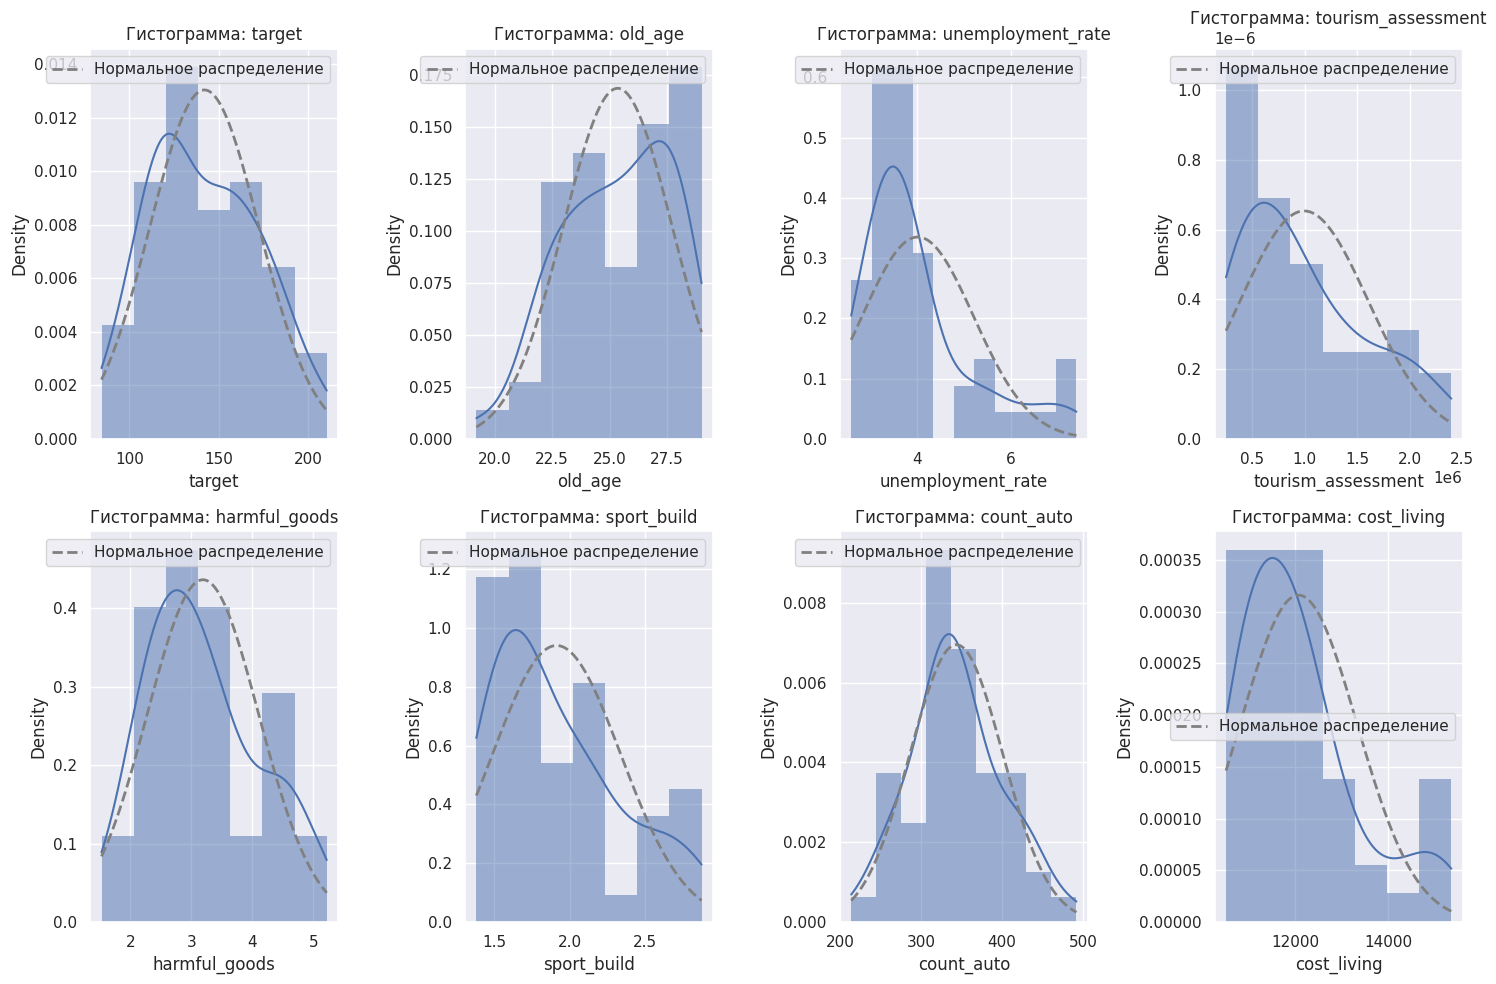

In [ ]:
histograms(data_upd)

В целом мы видим, что после удаления выбросов распределение на каждом графике приближено к нормальному. Следующий шаг нашего первичного анализа посмотреть как независимые переменные влияют на target

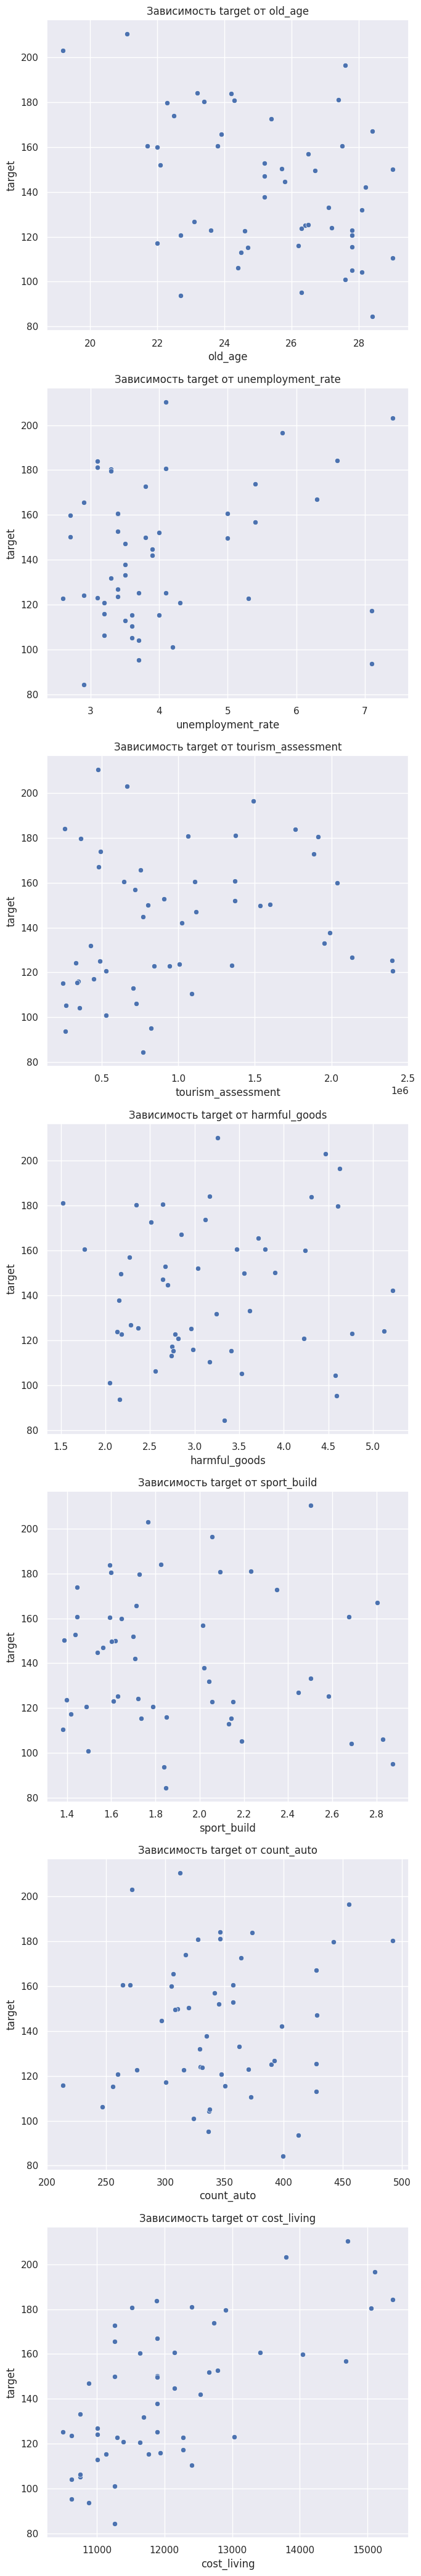

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = data_upd.drop('target', axis=1).shape[1]
fig, axes = plt.subplots(num_features, 1, figsize=(7, 6 * num_features))

for i, feature in enumerate(data_upd.drop('target', axis=1).columns):
    sns.scatterplot(x=data_upd[feature], y=data_upd['target'], ax=axes[i])
    axes[i].set_title(f'Зависимость target от {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('target')

plt.tight_layout()
plt.show()

Из построенных графиков можно отметить следующие наблюдения:


1.   Для count_auto, sport_build и harmful_goods взаимосвязь явно не выражена, и на графике нет четкой зависимости, они почти не коррелируют с target
2.   Для cost_living и old_age наоборот видно умеренную зависимость положительного и отрицательного характера соответственно
3.  Для unemployment_rate и tourism_assessment из графиков сложно сделать выводы о характере зависимости, но она явно слабая, но не настолько как у count_auto, sport_build и harmful_goods, где наблюдения располагаются хаотично.  
Следующим шагом проведем корреляционный анализ



<Axes: >

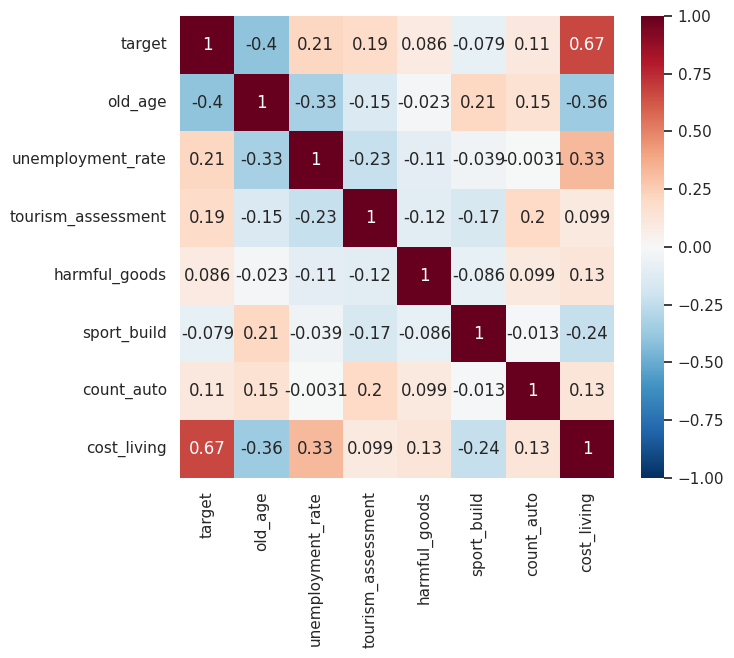

In [ ]:
plt.figure(figsize=(7,6))
corr = data_upd.corr()
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True)

Среди представленных корреляций, мы видим только несколько достаточно высоких(по сравнению с другими) значений, а именно corr(target,cost_living)=0.67 и corr(target,old_age) = -0.4. Остальные переменные почти не коррелируют между собой, с одной стороны это хорошо(у нас отсутсвует мультиколинеарность что благоприятно скажется на обучение модели), с другой стороны сама переменная target не коррелирует с независимыми переменными. Но возможно в совокупности при построении линейной регрессии наши признаки смогут описать target value. Теперь убедимся с помощью VIFов, что нет мультиколинеарности.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_upd_scal = scaler.fit_transform(data_upd.drop(columns=['target']))
vif_data = pd.DataFrame()
vif_data["Признак"] = data.columns.drop('target')
vif_data["VIF"] = [variance_inflation_factor(data_upd_scal, i) for i in range(data_upd_scal.shape[1])]
print(vif_data)

              Признак       VIF
0             old_age  1.386350
1   unemployment_rate  1.408565
2  tourism_assessment  1.290556
3       harmful_goods  1.110695
4         sport_build  1.107775
5          count_auto  1.147153
6         cost_living  1.348763


В целом за этот блок, мы убрали выбросы, убедились в остутствии мультиколинеарности(каждый VIF меньше 5), и поняли от каких независимых переменных больше зависит target

####3.	Построить уравнение регрессии со значимыми коэффициентами, используя пошаговые алгоритмы регрессионного анализа (1 балл). Рассмотреть возможность перехода от регрессии исходного признака к регрессии, в которой используются логарифмы некоторых показателей. Подобрать оптимальный вариант из моделей с логарифмами (1 балл). Выбрать лучшую из полученных регрессионных моделей̆, основываясь на анализе значений коэффициентов детерминации, остаточных дисперсий и по результатам содержательного анализа моделей̆ (1 балл). На основе графиков выделить переменные, влияющие на гетероскедастичность ошибок. Провести тесты Бройша-Пагана и Уайта для проверки гомоскедастичности ошибок. В случае гетероскедастичности выполнить поправку Уайта (1 балл). Провести анализ ошибок модели (1 балл).

Напишем функцию для отображения метрик

In [ ]:
def searchMetrics(y_pred_train,y_train):
  rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
  r2_train = r2_score(y_train, y_pred_train)

  return (rmse_train,r2_train)

И функция самой линейной регрессии

In [ ]:
def LinRegStatsModels(x_train,y_train):
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_train_sm = sm.add_constant(x_train)

  model_sm = sm.OLS(y_train, x_train_sm)
  results = model_sm.fit()
  y_pred_train_sm = results.predict(x_train_sm)
  return results

In [ ]:
y_train = data_upd['target']
x_train = data_upd.drop(columns=['target'])
result = LinRegStatsModels(x_train,y_train)

In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.423   
Dependent Variable: target           AIC:                482.1185
Date:               2024-11-11 08:08 BIC:                497.7285
No. Observations:   52               Log-Likelihood:     -233.06 
Df Model:           7                F-statistic:        6.336   
Df Residuals:       44               Prob (F-statistic): 3.59e-05
R-squared:          0.502            Scale:              540.77  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      141.9493    3.2248  44.0178  0.0000  135.4501  148.4485
x1          -6.1691    3.7970  -1.6247  0.1114  -13.8215    1.4832
x2          -0.7033    3.8273  -0.1838  0.8550   -8.4168    7.0101
x3           3.3521    3.6635   0.9150  0.3652   -4.0311   10.7354
x4           0.5427    3.3986   0.1597  0.8739   -6.3067    7.3922
x5           3.9147    3.3941   1.1534  0.2550   -2.9258   10.7551
x6           1.0923    3.4539   0.3163  0.7533   -5.8686    8.0533
x7          18.6035    3.7452   4.9673  0.0000   11.0556   26.1514
-----------------------------------------------------------------
Omnibus:              5.126        Durbin-Watson:           2.062
Prob(Omnibus):        0.077        Jarque-Bera (JB):        2.414
Skew:                 0.230        Prob(JB):                0.299
Kurtosis:             2.050        Condition No.:           2    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

Таблица характеристик для нашей линейной модели. Давайте сначала исследуем веса нашей линейной модели.

In [ ]:
coefficients = result.params
zero_weights = coefficients[coefficients == 0]
almost_zero_weights = coefficients[abs(coefficients) < 0.001]
print(f'Нулевые веса: {zero_weights}')
print(f'Веса близкие к 0: {almost_zero_weights}')
print(f'Минимальный вес: {min(abs(coefficients))}')

Нулевые веса: Series([], dtype: float64)
Веса близкие к 0: Series([], dtype: float64)
Минимальный вес: 0.542735064604507


Все веса получились не нулевыми, минимальный вес 0.5427. Для того чтобы понять какие веса больше влияют на target и значимость весов, обратимся к p-value и t-value

In [ ]:
print(result.pvalues)
print(f'Количество значимых признаков для модели на уровне значимости 0.05: {(result.pvalues<0.05).sum()}')
print(f'Всего признаков: {len(result.pvalues)}')

const    5.060192e-38
x1       1.113622e-01
x2       8.550377e-01
x3       3.651730e-01
x4       8.738538e-01
x5       2.549909e-01
x6       7.533060e-01
x7       1.073997e-05
dtype: float64
Количество значимых признаков для модели на уровне значимости 0.05: 2
Всего признаков: 8


Мы получили, что у нашей модели только 1 значимый признак cost_living. Посмотрим на метрики и проверим значимость самой модели

In [ ]:
print(f"R-squared: {result.rsquared}")
print(f"Adjusted R-squared: {result.rsquared_adj}")

# F-statistic и его P-значение
print(f"F-statistic: {result.fvalue}")
print(f"P-value for F-statistic: {result.f_pvalue}")


R-squared: 0.5020097991356092
Adjusted R-squared: 0.42278408536172873
F-statistic: 6.3364503167293025
P-value for F-statistic: 3.588677701350289e-05


Последним шагом будет проверить общую значимость модели, для этого рассчитаем критическое значение F статистики

In [ ]:
F_critical = stats.f.ppf(0.95, 7, len(y_train) - 8)
print(f"Критическое значение F: {F_critical}")

Критическое значение F: 2.2262529125117685


$F_{statistic}>F_{critical}$ то есть модель значима.$R_{Adj}^2$ = 0.42 < $R^2=0.5$. В целом не плохой результат, но хотелось бы и лучше, притом почти все наши коэффициенты не значимы, о чём можно судить как по p-value так и по меньшему значению скорректированого $R^2$. Давайте попробуем улучшить  этот результат постепенно убирая не значимые признаки. Для этого напишем функцию по удалению признаков.

In [ ]:
def UpdLinRegStatsModels(number,x_train,y_train):
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_train_sm = sm.add_constant(x_train)
  model_sm = sm.OLS(y_train, x_train_sm)
  results = model_sm.fit()
  y_pred_train_sm = results.predict(x_train_sm)

  rmse_train_sm,r2_train_sm = searchMetrics(y_pred_train_sm,y_train)

  print(f'StatsModel_{number}- RMSE: {rmse_train_sm:.5f}, R^2: {r2_train_sm:.5f}')
  return results

In [ ]:
def elimination_by_pvalue(number,x_train,y_train,factor):
    x_train_curr = x_train.copy()

    while True:
        columns = np.arange(x_train_curr.shape[1])

        model = UpdLinRegStatsModels(number,x_train_curr, y_train)
        number+=1

        p_values = model.pvalues[1:]
        if (p_values >= factor).sum() == 0:
            break

        delete_index = np.argmax(p_values)
        column_to_delete = columns[delete_index]
        x_train_curr = np.delete(x_train_curr, column_to_delete, axis=1)

        print(f"Удаляем x{column_to_delete + 1} с p-value = {p_values.max()}\n\n")
    return x_train_curr, model

In [ ]:
number = 0
a,b = elimination_by_pvalue(number,data_upd.drop(columns=['target']),y_train,0.05)

StatsModel_0- RMSE: 21.39100, R^2: 0.50201
Удаляем x4 с p-value = 0.8738538041593932


StatsModel_1- RMSE: 21.39720, R^2: 0.50172
Удаляем x2 с p-value = 0.821006901366304


StatsModel_2- RMSE: 21.40951, R^2: 0.50115
Удаляем x4 с p-value = 0.7424818400720051


StatsModel_3- RMSE: 21.43492, R^2: 0.49996
Удаляем x2 с p-value = 0.2498261954541788


StatsModel_4- RMSE: 21.74230, R^2: 0.48552
Удаляем x2 с p-value = 0.30870564045810156


StatsModel_5- RMSE: 21.98073, R^2: 0.47417
Удаляем x1 с p-value = 0.10165959723017513


StatsModel_6- RMSE: 22.59628, R^2: 0.44431


Мы постепенно удаляем все признаки, пока не останется 1 значимый и $R^2$ стремится к $R_{Adj}^2$

In [ ]:
b.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.433   
Dependent Variable: target           AIC:                475.8193
Date:               2024-11-11 08:08 BIC:                479.7218
No. Observations:   52               Log-Likelihood:     -235.91 
Df Model:           1                F-statistic:        39.98   
Df Residuals:       50               Prob (F-statistic): 6.88e-08
R-squared:          0.444            Scale:              531.02  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      141.9493    3.1956  44.4203  0.0000  135.5308  148.3679
x1          20.2052    3.1956   6.3228  0.0000   13.7867   26.6238
-----------------------------------------------------------------
Omnibus:              2.397        Durbin-Watson:           2.081
Prob(Omnibus):        0.302        Jarque-Bera (JB):        1.857
Skew:                 0.300        Prob(JB):                0.395
Kurtosis:             2.294        Condition No.:           1    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

F-statistic только увеличилась то есть модель тоже значима, притом $R^2$ уменьшился. Но $R_{Adj}^2$ увеличился, и мы по сути добились того же результата, но с более значимой моделью и избавившись от лишних предикторов. В первой модели у нас была проблема со значимостью признаков, это может о говорить о малых размерах выборки, которая не описывает значимость этих коэффициентов или например что данная зависимость не описывается явно с помощью линейной регрессии. Теперь давайте попробуем 2ой способ улучшить первоначальную модель-прологорифмировать коэффициенты, обсуждаемые в предыдущем пункте.

In [ ]:
data_upd.columns

Index(['target', 'old_age', 'unemployment_rate', 'tourism_assessment',
       'harmful_goods', 'sport_build', 'count_auto', 'cost_living'],
      dtype='object')

In [ ]:
columns_to_log = ['old_age','unemployment_rate','tourism_assessment','cost_living','sport_build']
data_upd_log = data_upd.copy()
for column in columns_to_log:
    data_upd_log[column] = np.log(data[column] + 1)
result = LinRegStatsModels(data_upd_log.drop(columns=['target']),y_train)

После того как мы прологарифмировали 5 показателей, наши коэффициенты детерминации выросли, но все еще только 1 параметр является значимым. Как я уже пояснил модель с 1 признаком лучше изначальной построенной модели, так давайте теперь с логарифмированной моделью проделаем тот же elimination by p-value и получим пока что лучшую из наших построенных моделей

In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.448   
Dependent Variable: target           AIC:                479.8390
Date:               2024-11-11 08:08 BIC:                495.4489
No. Observations:   52               Log-Likelihood:     -231.92 
Df Model:           7                F-statistic:        6.902   
Df Residuals:       44               Prob (F-statistic): 1.50e-05
R-squared:          0.523            Scale:              517.58  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      141.9493    3.1549  44.9933  0.0000  135.5910  148.3076
x1          -6.1174    3.6759  -1.6642  0.1032  -13.5257    1.2910
x2           0.3128    3.7374   0.0837  0.9337   -7.2194    7.8450
x3           5.1910    3.5616   1.4575  0.1521   -1.9870   12.3690
x4           0.8791    3.3440   0.2629  0.7939   -5.8603    7.6185
x5           4.7482    3.3394   1.4218  0.1621   -1.9820   11.4784
x6           1.0448    3.3548   0.3114  0.7569   -5.7163    7.8059
x7          18.2795    3.6781   4.9698  0.0000   10.8668   25.6923
-----------------------------------------------------------------
Omnibus:              4.740        Durbin-Watson:           2.039
Prob(Omnibus):        0.093        Jarque-Bera (JB):        2.108
Skew:                 0.135        Prob(JB):                0.348
Kurtosis:             2.051        Condition No.:           2    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [ ]:
number = 0
alog,blog = elimination_by_pvalue(number,data_upd_log.drop(columns=['target']),y_train,0.05)

StatsModel_0- RMSE: 20.92723, R^2: 0.52337
Удаляем x2 с p-value = 0.9336780009018563


StatsModel_1- RMSE: 20.92890, R^2: 0.52329
Удаляем x3 с p-value = 0.8016324377059114


StatsModel_2- RMSE: 20.94375, R^2: 0.52262
Удаляем x4 с p-value = 0.7200905479378221


StatsModel_3- RMSE: 20.97332, R^2: 0.52127
Удаляем x3 с p-value = 0.1502339875177292


StatsModel_4- RMSE: 21.44530, R^2: 0.49948
Удаляем x2 с p-value = 0.16067627884836097


StatsModel_5- RMSE: 21.89412, R^2: 0.47831
Удаляем x1 с p-value = 0.10261049658425507


StatsModel_6- RMSE: 22.50380, R^2: 0.44885


In [367]:
blog.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.438   
Dependent Variable: target           AIC:                475.3928
Date:               2024-11-11 08:26 BIC:                479.2952
No. Observations:   52               Log-Likelihood:     -235.70 
Df Model:           1                F-statistic:        40.72   
Df Residuals:       50               Prob (F-statistic): 5.58e-08
R-squared:          0.449            Scale:              526.68  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
const      141.9493    3.1825  44.6028  0.0000  135.5570  148.3416
x1          20.3082    3.1825   6.3812  0.0000   13.9159   26.7005
-----------------------------------------------------------------
Omnibus:              2.135        Durbin-Watson:           2.055
Prob(Omnibus):        0.344        Jarque-Bera (JB):        1.673
Skew:                 0.269        Prob(JB):                0.433
Kurtosis:             2.306        Condition No.:           1    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

Мы опять пришли к тому, что все остальные features удалились но по сравнению с нелогарифмированной моделью мы получили большый rmse и больший r^2. Пока что это лучшая из полученных моделей. В целом понятно, что обе модели недостаточно хороши, чтобы осуществлять линейную регрессию на должном уровне. По моему мнению, выбранные данные врятли описываются линейной связью, и с такой маленькой выборкой. Поэтому все таки если уж и выбирать, то модель с логарифмированными признаками побеждает. Следующий наш этап будет исследование на гетероскедастичность.

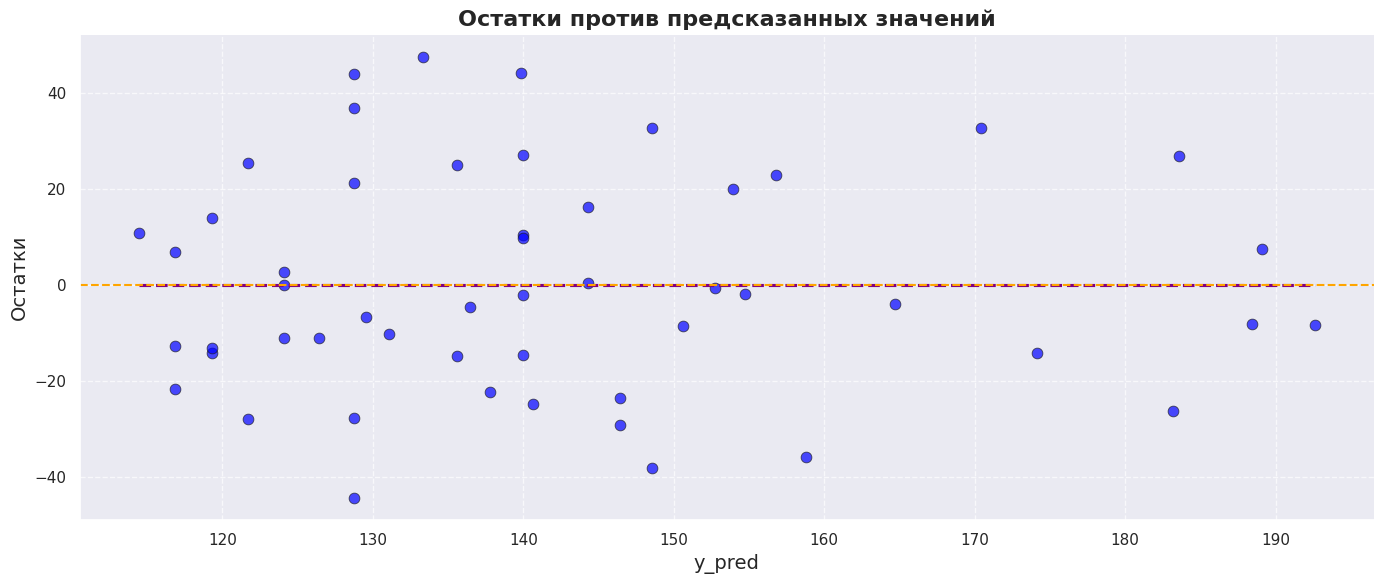

In [ ]:
alog = sm.add_constant(alog)
model = sm.OLS(y_train, alog).fit()
y_pred = model.predict(alog)
res = y_train - y_pred

fig, ax = plt.subplots(figsize=(14, 6))
sns.scatterplot(x=y_pred, y=res, ax=ax, color='blue', edgecolor='k', s=60, alpha=0.7)
sns.regplot(x=y_pred, y=res, ax=ax, scatter=False, color='purple', ci=None, line_kws={'linestyle': '--'})

ax.axhline(0, color='orange', linestyle='--', linewidth=1.5)
ax.set_title('Остатки против предсказанных значений', fontsize=16, fontweight='bold')
ax.set_xlabel('y_pred', fontsize=14)
ax.set_ylabel('Остатки', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Они довольно равномерно распределены, я предположу, что ошибки гомоскедастичны. Теперь чтобы убедиться проведем тест Бройша-Пагана и Уайта

In [ ]:
broysh = sms.het_breuschpagan(model.resid, model.model.exog)
print(f'Тест Бройша-Пагана --- Статистика:{ broysh[0]:.3f},p-value:{broysh[1]:.3f}')

Тест Бройша-Пагана --- Статистика:0.079,p-value:0.778


In [ ]:
white = sms.het_white(model.resid, model.model.exog)
print(f'Тест Уайта --- Статистика:{ white[0]:.3f},p-value:{white[1]:.3f}')

Тест Уайта --- Статистика:2.387,p-value:0.303


p-value в обоих тестах > 0.05, следовательно наша модель действительно гомоскедастична.

Теперь обучим модель с L2 регуляризаций и применением кросс валидации.

In [364]:
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score

gamma = np.linspace(0.001, 1, 100)
modelR = RidgeCV(alphas=gamma,cv=5,scoring=make_scorer(r2_score))
X_train = data_upd.drop(columns=['target'])
modelR.fit(X_train, y_train)
y_train_pred = modelR.predict(X_train)

print("Best param:", modelR.alpha_)
rmse_train,r2_train = searchMetrics(y_train_pred,y_train)
print(f"Train RMSE = {rmse_train:.4f}, R2 = {r2_train:.4f}"  )

Best param: 1.0
Train RMSE = 21.3948, R2 = 0.5018


In [366]:
beta = np.linspace(0.001, 1, 100)
modelL = LassoCV(alphas = beta,cv=5)
modelL.fit(X_train, y_train)
y_train_pred = modelL.predict(X_train)

print("Best param:", modelL.alpha_)
rmse_train,r2_train = searchMetrics(y_train_pred,y_train)
print(f"Train RMSE = {rmse_train:.4f}, R2 = {r2_train:.4f}"  )

Best param: 1.0
Train RMSE = 21.5661, R2 = 0.4938


Если сравнивать Лассо и Ридж, то в целом у них получились похожие результаты. Правда,Ridge получил немного больше R2 и меньше ошибку RMSE. Поэтому линейная регрессия с L2 регуляризацией лучше описывает данные. И по показателям RMSE и R2 они превосходят логарифмическую модель, но вероятно потому что им легче справляться с шумом в данных